In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

#Construyendo un modelo

In [ ]:
data_path = 'data/'
#Datapath para entrenamiento.
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))
#Datapath para validación.
full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#Cargar los datos en un tamaño.
size = 4             #Cada batch será de 4 imágenes.
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog
dog
frog
deer


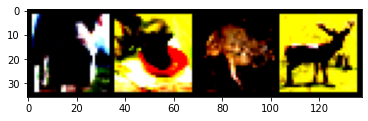

In [ ]:
data_iterator = iter(dataloader)          #Iterador sobre el dataloader
imgs, labels = data_iterator.next()       #Llamamos a la imágen y las etiquetas

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']    #Clases del dataset

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [ ]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']  #Nos quedamos con las clases car y cat.

label_map = {1: 0, 3: 1}   #Hacemos un mapeo, de classes se ve que las posiciones de car y cat son 1 y 3 respectivamente. Se mapean a 0 y 1.

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [ ]:
#Del nuevo dataset con gatos y coches mostramos la forma de los tensores.
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [ ]:
#Construcción del modelo (red neuronal).
model = nn.Sequential(                      #Hacemos varias llamadas con sequential.
            nn.Linear(3 * 32 * 32, 512),    #512 es el número de nodos de salida de neuronas.
            nn.Tanh(),                      #Función de activación.
            nn.Linear(512, 2))              #Salida binaria.

In [ ]:
#Queremos como salida una probabilidad, con la función sigmoid se verá que el resultado es mayor que 1 por lo que no nos sirve.
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

x = torch.tensor([1.0, 2.0, 3.0])
print(sigmoid(x))  
sigmoid(x).sum()

tensor([0.7311, 0.8808, 0.9526])


tensor(2.5644)

In [ ]:
#Usando la función softmax, la salida es 1.
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()
print(softmax(x))    
softmax(x).sum()

tensor([0.0900, 0.2447, 0.6652])


tensor(1.)

In [ ]:
#Mostramos la función softmax pero ahora usando el módulo de redes neuronales torch.nn
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [ ]:
#Regresamos al modelo y ahora incluimos la función softmax.
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

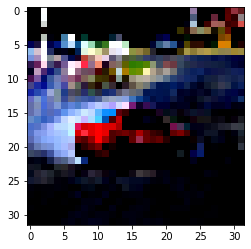

In [ ]:
#Mostramos la imágen y su clase.
img, label = data_set[20]
plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [ ]:
out = model(img.view(-1).unsqueeze(0))  #Mostramos la salida como un tensor con probabilidadas.
out                                     #Las posiciones indican la probabilidad de acuerdo a la posición del arreglo.

tensor([[0.5626, 0.4374]], grad_fn=<SoftmaxBackward>)

In [ ]:
#Mostramos lo que es la imágen y lo que predice el modelo, de acuerdo al tensor previamente obtenido.
_, index = torch.max(out, dim=1)
print('->',class_names[label],' model:',class_names[index])

-> car  model: car


In [ ]:
softmax = nn.Softmax(dim=1)
log_softmax = nn.LogSoftmax(dim=1)
x = torch.tensor([[0.0, 110.0]])
softmax(x)

tensor([[0., 1.]])

In [ ]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [ ]:
log_softmax(x)

tensor([[-110.,    0.]])

In [ ]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

#Implementando un clasificador totalmente conectado


In [2]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))
loss = nn.NLLLoss()

In [3]:
img, label = data_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('->',class_names[label],' model:',class_names[index])
loss(out, torch.tensor([label]))

NameError: ignored

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [ ]:
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
lossFunction = nn.NLLLoss()
n_epochs = 5 #100

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = lossFunction(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

optimizer = optim.SGD(model.parameters(), lr=0.02)
loss_function = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

In [ ]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

#Mejoras, limitaciones y conclusiones

In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('correct: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))

In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

In [ ]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

In [ ]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))